In [1]:
import numpy as np
import pandas as pd 
import os
import time
from datetime import date, datetime
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
inmates = pd.read_csv('../input/daily-inmates-in-custody.csv')

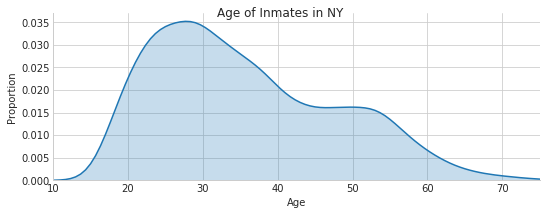

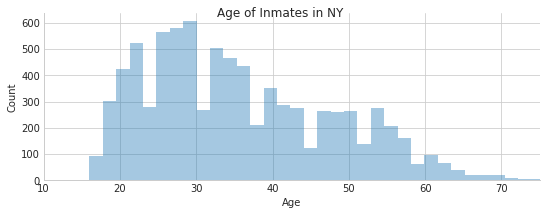

In [2]:
ages=[]
for i in inmates['AGE']:
    ages.append(i)
ages = pd.DataFrame(ages)
ages.describe()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(ages,aspect=2.5)
plotOne.map(sns.kdeplot,0,shade=True)
plotOne.set(xlim=(10, 75))
plotOne.set_axis_labels('Age', 'Proportion')
plotOne.fig.suptitle('Age of Inmates in NY')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(ages,aspect=2.5)
plotOne.map(sns.distplot,0,kde=False)
plotOne.set(xlim=(10, 75))
plotOne.set_axis_labels('Age', 'Count')
plotOne.fig.suptitle('Age of Inmates in NY')
plt.show()

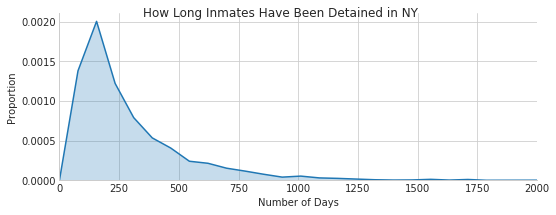

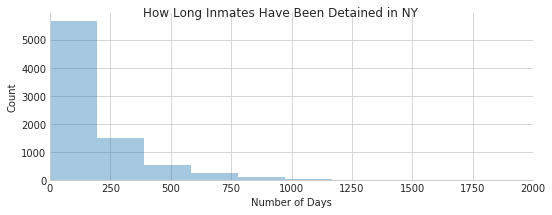

In [3]:
daysInJail=[]
today = datetime.now().date()
for i in inmates['ADMITTED_DT']:
    dateOfArrival_0 = parser.parse(i)
    jailday = dateOfArrival_0.date()
    diff = jailday - today
    a= diff.days
    b= -a
    daysInJail.append(b)
daysInJail = pd.DataFrame(daysInJail)
#daysInJail.describe()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(daysInJail,aspect=2.5)
plotOne.map(sns.kdeplot,0,shade=True)
plotOne.set(xlim=(0, 2000))
plotOne.set_axis_labels('Number of Days', 'Proportion')
plotOne.fig.suptitle('How Long Inmates Have Been Detained in NY')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(daysInJail,aspect=2.5)
plotOne.map(sns.distplot,0,kde=False)
plotOne.set(xlim=(0, 2000))
plotOne.set_axis_labels('Number of Days', 'Count')
plotOne.fig.suptitle('How Long Inmates Have Been Detained in NY')
plt.show()

In [4]:
GENDER = inmates['GENDER'].value_counts()
print('Gender -- # of Inmates')
print(GENDER.head(10))

Gender -- # of Inmates
M    7711
F     494
Name: GENDER, dtype: int64


In [5]:
gender = pd.DataFrame(GENDER)
gender['Gender'] = gender.index
gender = gender[['Gender', 'GENDER']]
#print(gender)
trace1 = go.Bar(
                x = gender.Gender,
                y = gender.GENDER,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = gender.Gender)
data = [trace1]
layout = go.Layout(barmode = "group",title='Gender of Inmates in NY')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [6]:
pie1 = gender.GENDER
pie1_list=pie1
labels = gender.Gender
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Gender of Inmates in NY",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Gender of Inmates in NY",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "Blue=Male; Orange=Female",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)

In [7]:
RACE = inmates['RACE'].value_counts()
print('Race -- # of Inmates')
print(RACE.head(10))

Race -- # of Inmates
B    4548
O    2554
W     923
A     143
U      20
I      17
Name: RACE, dtype: int64


In [8]:
race = pd.DataFrame(RACE)
race['Race'] = race.index
race = race[['Race', 'RACE']]
#print(race)
trace1 = go.Bar(
                x = race.Race,
                y = race.RACE,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = race.Race)
data = [trace1]
layout = go.Layout(barmode = "group",title='Race of Inmates in NY')
fig = go.Figure(data = data, layout = layout)
iplot(fig)
print('B: Black, O: Other, W: White, A: Asian, U: Pacific Island, I: American Indian')

B: Black, O: Other, W: White, A: Asian, U: Pacific Island, I: American Indian


In [9]:
pie1 = race.RACE
pie1_list=pie1
labels = race.Race
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Race of Inmates in NY",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Race of Inmates in NY",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": "B: Black, O: Other, W: White, A: Asian, U: Pacific Island, I: American Indian",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)

In [10]:
CUSTODY_LEVEL = inmates['CUSTODY_LEVEL'].value_counts()
print('Custody Level -- # of Inmates')
print(CUSTODY_LEVEL.head(10))

Custody Level -- # of Inmates
MED    3285
MIN    2659
MAX    2125
Name: CUSTODY_LEVEL, dtype: int64


In [11]:
custody_level = pd.DataFrame(CUSTODY_LEVEL)
custody_level['Custody_Level'] = custody_level.index
custody_level = custody_level[['Custody_Level', 'CUSTODY_LEVEL']]
#print(race)
trace1 = go.Bar(
                x = custody_level.Custody_Level,
                y = custody_level.CUSTODY_LEVEL,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = custody_level.Custody_Level)
data = [trace1]
layout = go.Layout(barmode = "group",title='Custody Level of Inmates in NY')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [12]:
pie1 = custody_level.CUSTODY_LEVEL
pie1_list=pie1
labels = custody_level.Custody_Level
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Race of Inmates in NY",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Custody Level of Inmates in NY",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": "MIN: Minimum Security, MED: Medium Security, MAX: Maximum Security ",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)

In [13]:
INFRACTION = inmates['INFRACTION'].value_counts()
print('Infraction -- # of Inmates')
print(INFRACTION.head(10))

Infraction -- # of Inmates
N    5714
Y    2512
Name: INFRACTION, dtype: int64


In [14]:
infraction = pd.DataFrame(INFRACTION)
infraction['Infraction'] = infraction.index
infraction = infraction[['Infraction', 'INFRACTION']]
#print(race)
trace1 = go.Bar(
                x = infraction.Infraction,
                y = infraction.INFRACTION,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = infraction.Infraction)
data = [trace1]
layout = go.Layout(barmode = "group",title='Infractions by Inmates in NY')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [15]:
pie1 = infraction.INFRACTION
pie1_list=pie1
labels = infraction.Infraction
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Race of Inmates in NY",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Infractions by Inmates in NY",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": "Y: Yes, N: No",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)

In [16]:
SRG_FLG = inmates['SRG_FLG'].value_counts()
print('Gang Affiliated -- # of Inmates')
print(SRG_FLG.head(10))

Gang Affiliated -- # of Inmates
N    7123
Y    1103
Name: SRG_FLG, dtype: int64


In [17]:
srg_flg = pd.DataFrame(SRG_FLG)
srg_flg['Srg_Flg'] = srg_flg.index
srg_flg = srg_flg[['Srg_Flg', 'SRG_FLG']]
#print(race)
trace1 = go.Bar(
                x = srg_flg.Srg_Flg,
                y = srg_flg.SRG_FLG,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = srg_flg.Srg_Flg)
data = [trace1]
layout = go.Layout(barmode = "group",title='Gang Affiliated Inmates in NY')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [18]:
pie1 = srg_flg.SRG_FLG
pie1_list=pie1
labels = srg_flg.Srg_Flg
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Race of Inmates in NY",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Gang Affiliated Inmates in NY",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": "Y: Yes, N: No",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)

In [19]:
BRADH = inmates['BRADH'].value_counts()
print('Mental Health Observation -- # of Inmates')
print(BRADH.head(10))

Mental Health Observation -- # of Inmates
N    4664
Y    3562
Name: BRADH, dtype: int64


In [20]:
bradh = pd.DataFrame(BRADH)
bradh['Bradh'] = srg_flg.index
bradh = bradh[['Bradh', 'BRADH']]
#print(race)
trace1 = go.Bar(
                x = bradh.Bradh,
                y = bradh.BRADH,
                name = "citations",
                marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = bradh.Bradh)
data = [trace1]
layout = go.Layout(barmode = "group",title='Inmates in NY under Mental Health Observation')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [21]:
pie1 = bradh.BRADH
pie1_list=pie1
labels = bradh.Bradh
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, 1]},
      "name": "Inmates in NY under Mental Health Observation",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
  "layout": {
        "title":"Inmates in NY under Mental Health Observation",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": "Y: Yes, N: No",
                "x": 0.5,
                "y": -0.2
            },
        ]
    }
}
iplot(fig)